In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 1: Load and Explore Data
# ============================================================================

print("=" * 80)
print("STATISTICAL ARBITRAGE PROJECT - DATA EXPLORATION")
print("=" * 80)

# Load the data files
print("\n1. Loading data files...")
try:
    df_prices = pd.read_csv('/content/coin_all_prices_full.csv')
    df_universe = pd.read_csv('/content/coin_universe_150K_40.csv')
    print("✓ Data files loaded successfully")
except Exception as e:
    print(f"✗ Error loading files: {e}")
    print("\nPlease ensure the following files are in the same directory:")
    print("  - coins_all_prices.csv")
    print("  - coins_universe_150K_40.csv")

# Display basic information
print("\n2. Dataset Overview:")
print(f"\nPrices DataFrame Shape: {df_prices.shape}")
print(f"Universe DataFrame Shape: {df_universe.shape}")

print("\n3. Prices DataFrame - First Few Rows:")
print(df_prices.head())

print("\n4. Prices DataFrame - Column Names:")
print(df_prices.columns.tolist())

print("\n5. Universe DataFrame - First Few Rows:")
print(df_universe.head())

print("\n6. Universe DataFrame - Column Names:")
print(df_universe.columns.tolist())

print("\n7. Data Types:")
print(f"\nPrices DataFrame:")
print(df_prices.dtypes)
print(f"\nUniverse DataFrame:")
print(df_universe.dtypes)

print("\n8. Missing Values:")
print(f"\nPrices DataFrame - Missing values per column:")
print(df_prices.isnull().sum())
print(f"\nUniverse DataFrame - Missing values per column:")
print(df_universe.isnull().sum())

print("\n9. Date Range:")
if 'timestamp' in df_prices.columns or 'time' in df_prices.columns:
    time_col = 'timestamp' if 'timestamp' in df_prices.columns else 'time'
    print(f"Start: {df_prices[time_col].min()}")
    print(f"End: {df_prices[time_col].max()}")
    print(f"Number of timestamps: {df_prices[time_col].nunique()}")

print("\n10. Number of Unique Tokens:")
# This will depend on the actual structure of the data
# We'll determine this after seeing the output

print("\n" + "=" * 80)
print("Please share the output above so we can proceed to Step 2")
print("=" * 80)

STATISTICAL ARBITRAGE PROJECT - DATA EXPLORATION

1. Loading data files...
✓ Data files loaded successfully

2. Dataset Overview:

Prices DataFrame Shape: (14015, 127)
Universe DataFrame Shape: (14015, 42)

3. Prices DataFrame - First Few Rows:
                   startTime          time   1INCH    AAVE  AGLD  ALCX  ALGO  \
0  2021-02-19T05:00:00+00:00  1.610000e+12  4.6235  425.14   0.0   0.0   0.0   
1  2021-02-19T06:00:00+00:00  1.610000e+12  4.6723  426.22   0.0   0.0   0.0   
2  2021-02-19T07:00:00+00:00  1.610000e+12  4.7021  431.05   0.0   0.0   0.0   
3  2021-02-19T08:00:00+00:00  1.610000e+12  4.7064  438.60   0.0   0.0   0.0   
4  2021-02-19T09:00:00+00:00  1.610000e+12  4.6861  432.83   0.0   0.0   0.0   

   ALICE    ALPHA    AMPL  ...       TRU       TRX     TRYB     UNI    WAVES  \
0    0.0  1.56335  1.1615  ...  0.480175  0.056620  0.14225  20.510  12.0160   
1    0.0  1.58640  1.1860  ...  0.498175  0.059780  0.14206  20.388  12.5160   
2    0.0  1.56435  1.2073  ...  0.

STATISTICAL ARBITRAGE PROJECT - MAIN EXECUTION

STEP 1: Loading Data...
Loading data files...
✓ Data loaded: 14015 hourly observations
✓ Date range: 2021-02-19 05:00:00+00:00 to 2022-09-26 03:00:00+00:00

STEP 2: Initializing Backtester...
✓ Backtester initialized

STEP 3: Running Backtest...
STARTING BACKTEST
Backtest period: 2021-09-26 00:00:00+00:00 to 2022-09-25 23:00:00+00:00
Total timestamps: 8760
Window size: 240 hours
Number of factors: 2

Processing: 0/8760 (0.0%) - 2021-09-26 00:00:00+00:00
Processing: 500/8760 (5.7%) - 2021-10-16 20:00:00+00:00
Processing: 1000/8760 (11.4%) - 2021-11-06 16:00:00+00:00
Processing: 1500/8760 (17.1%) - 2021-11-27 12:00:00+00:00
Processing: 2000/8760 (22.8%) - 2021-12-18 08:00:00+00:00
Processing: 2500/8760 (28.5%) - 2022-01-08 04:00:00+00:00
Processing: 3000/8760 (34.2%) - 2022-01-29 00:00:00+00:00
Processing: 3500/8760 (40.0%) - 2022-02-18 20:00:00+00:00
Processing: 4000/8760 (45.7%) - 2022-03-11 16:00:00+00:00
Processing: 4500/8760 (51.4%) - 

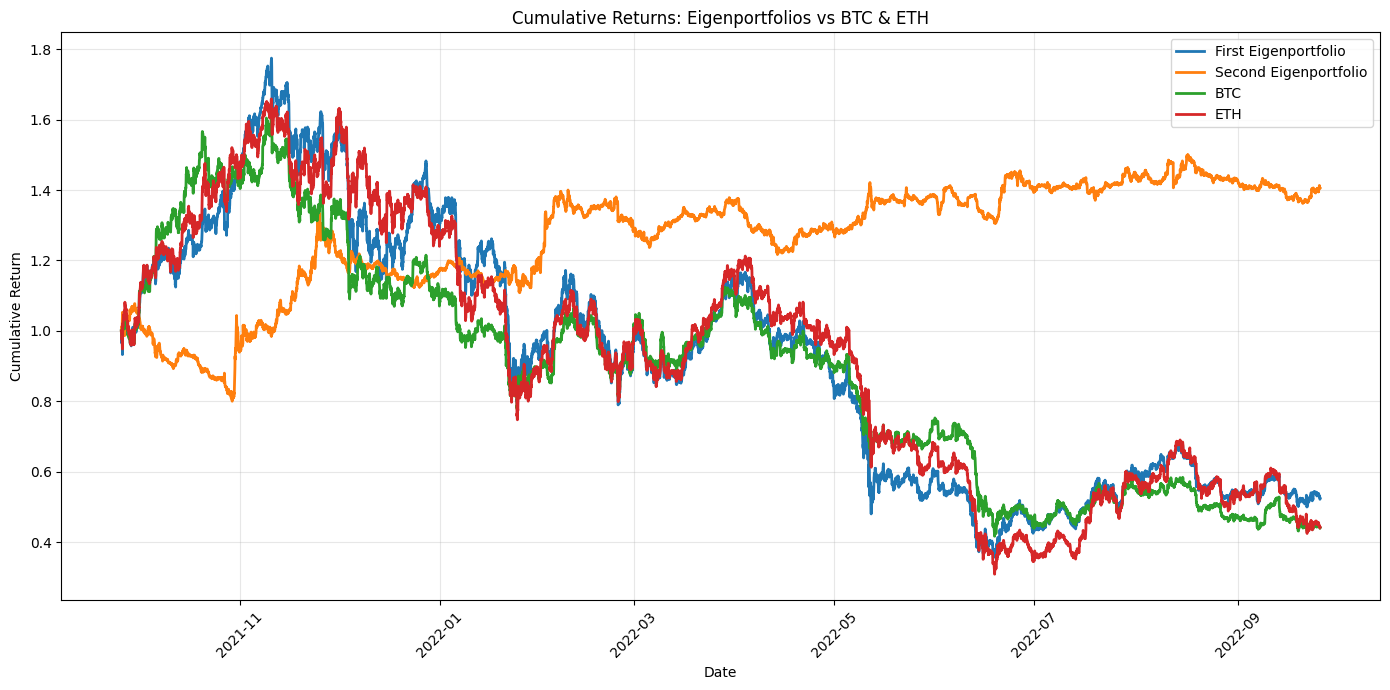


TASK 2: Eigenportfolio Weights Visualization


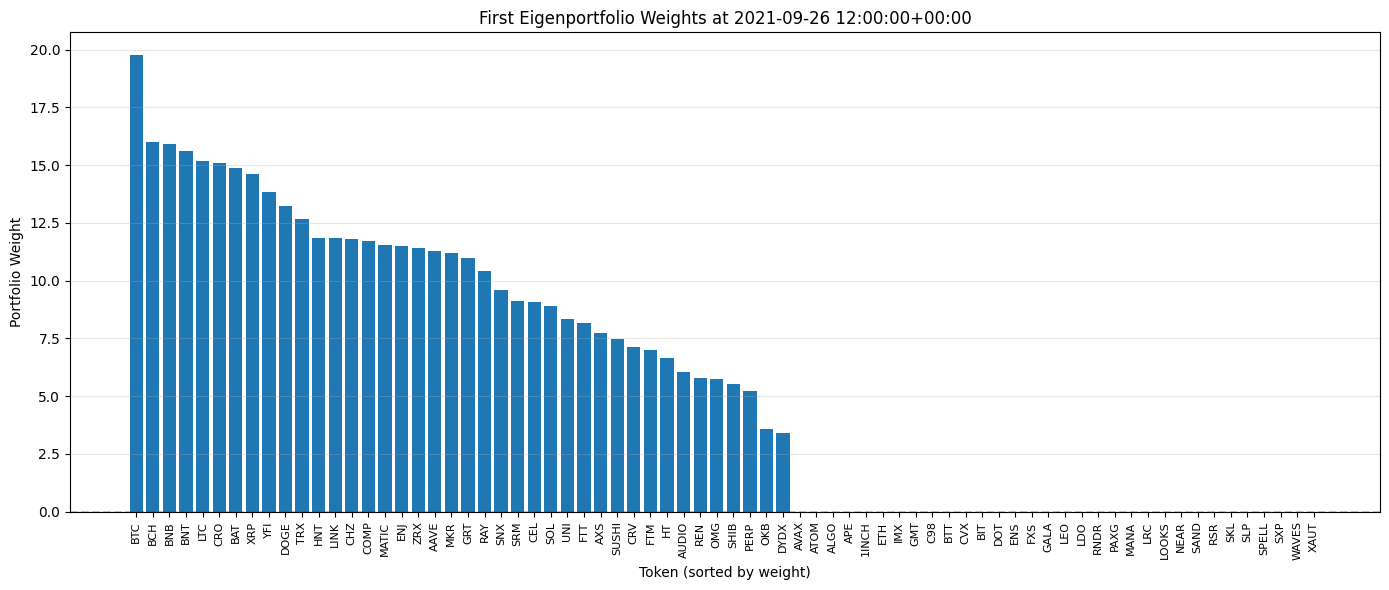

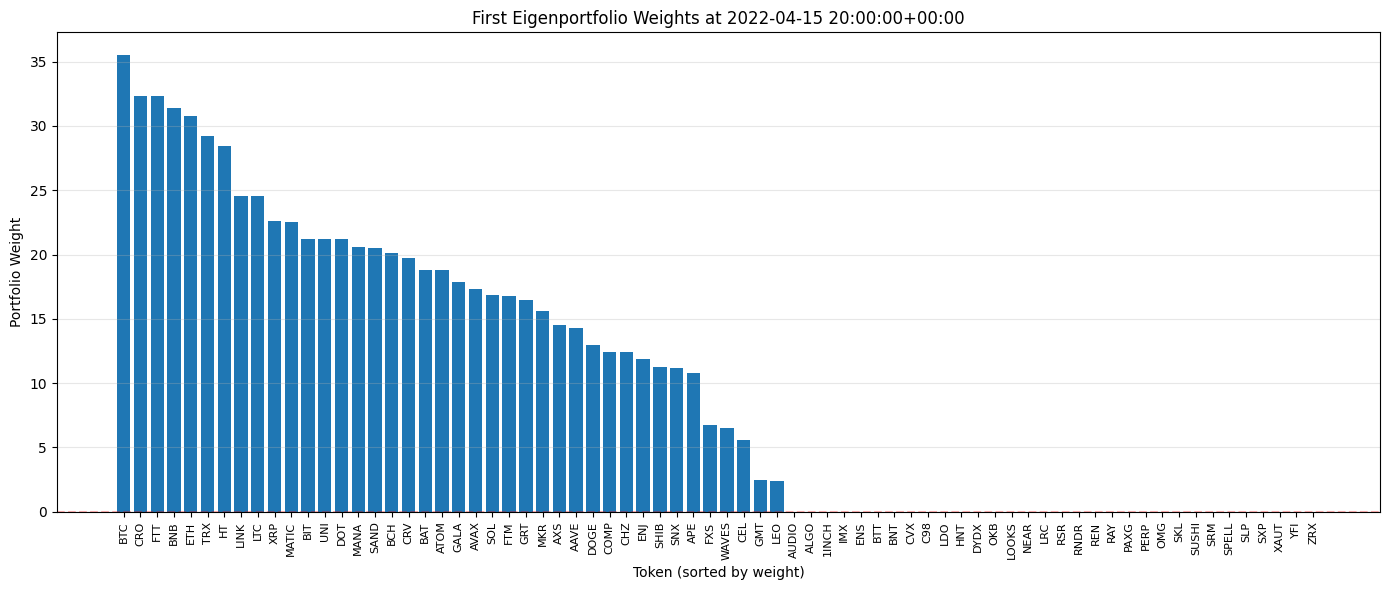

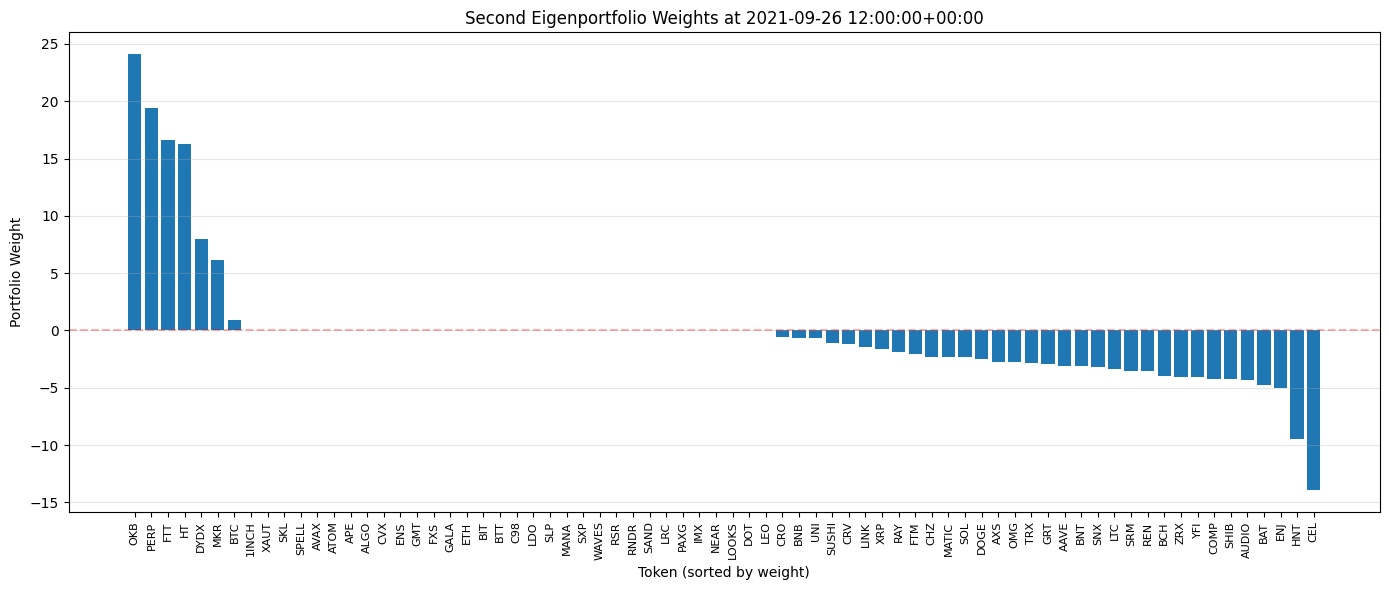

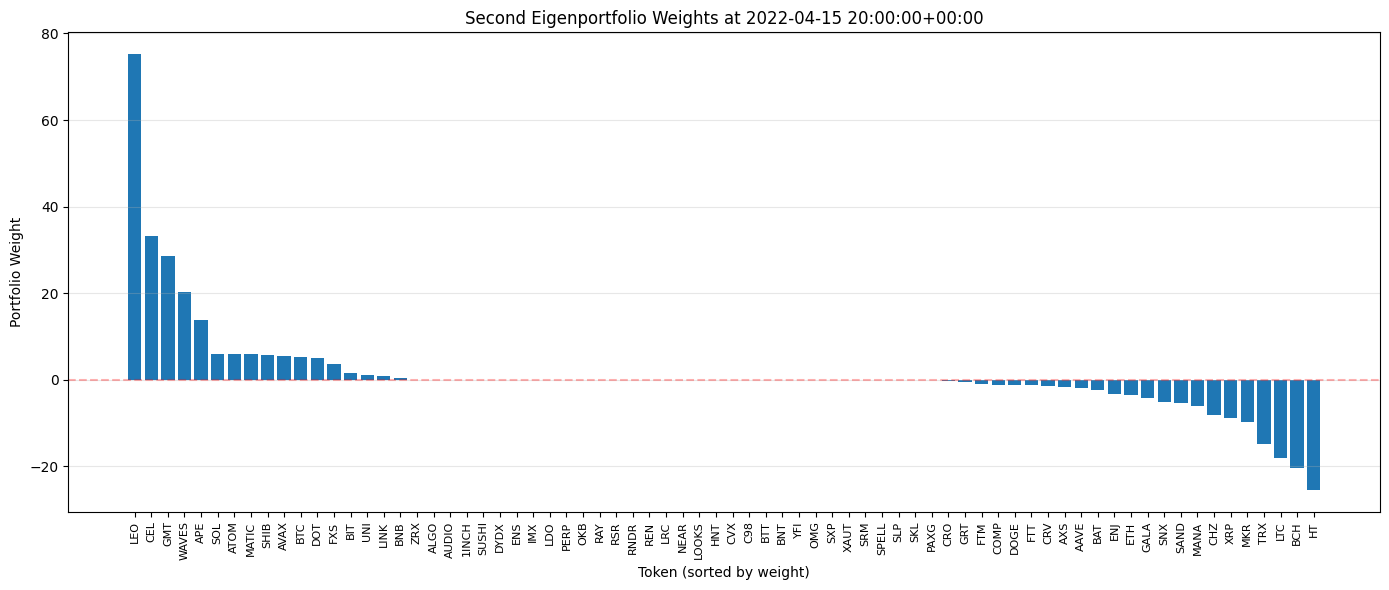


TASK 3: S-Score Evolution


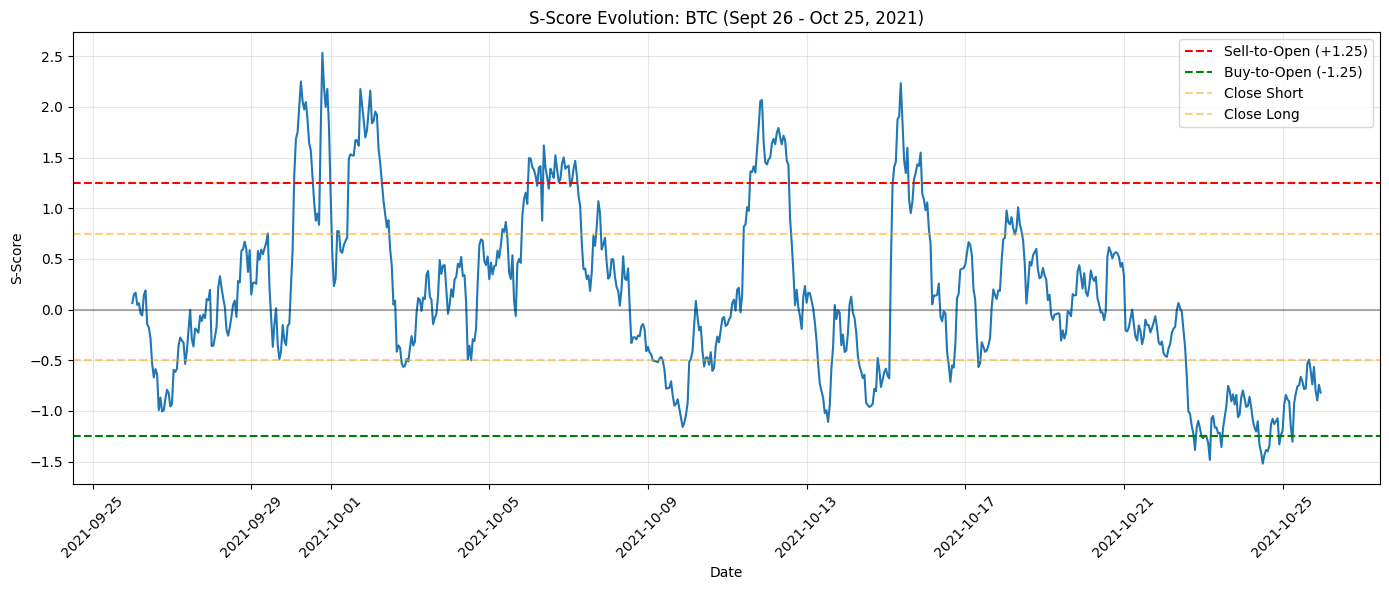

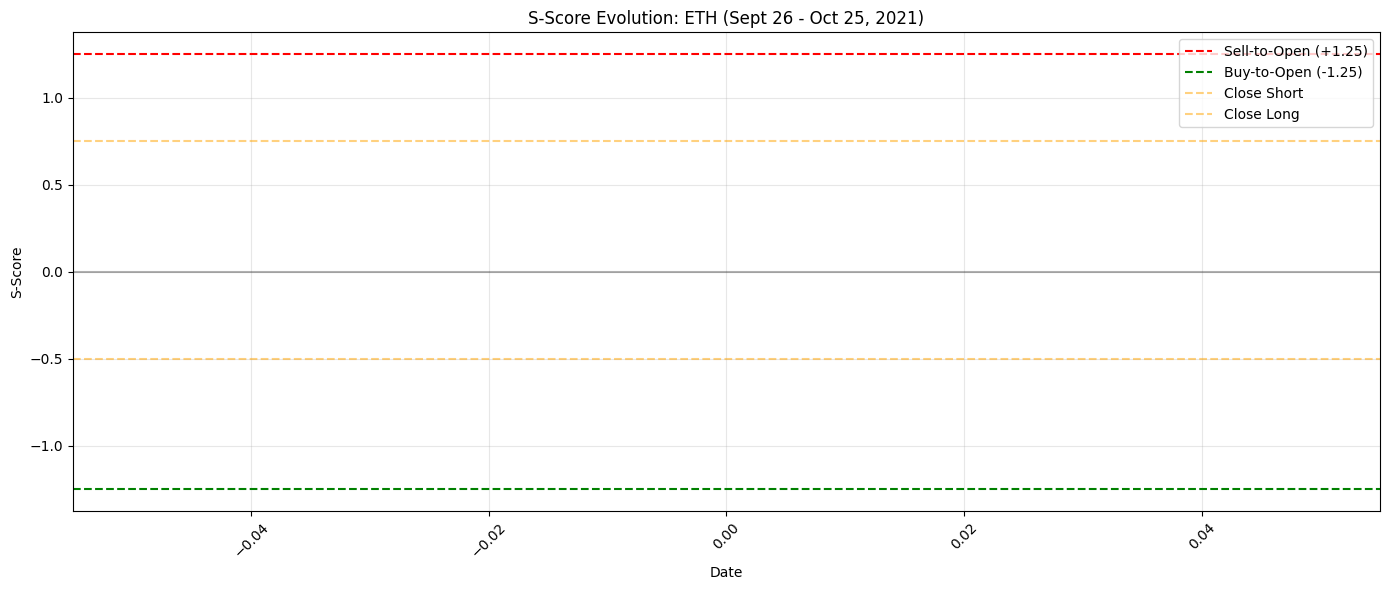


TASK 4: Strategy Performance
✓ Saved: trading_signals.csv


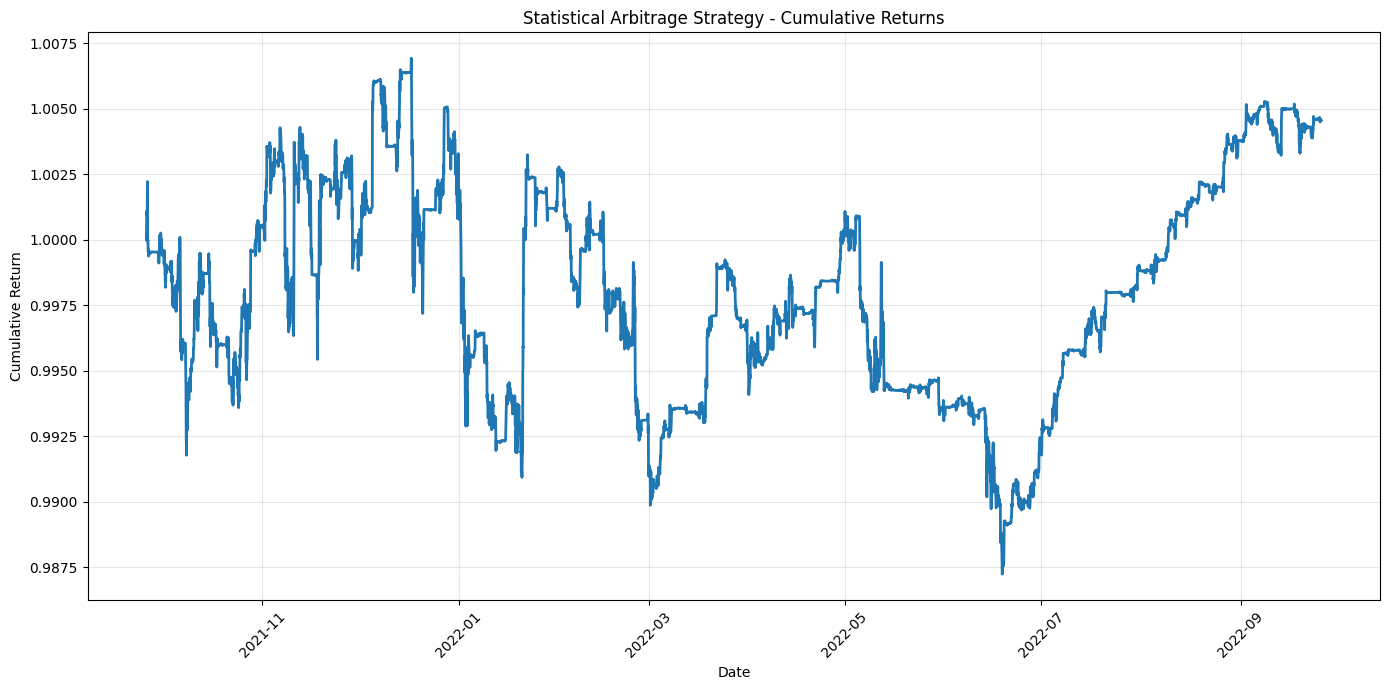

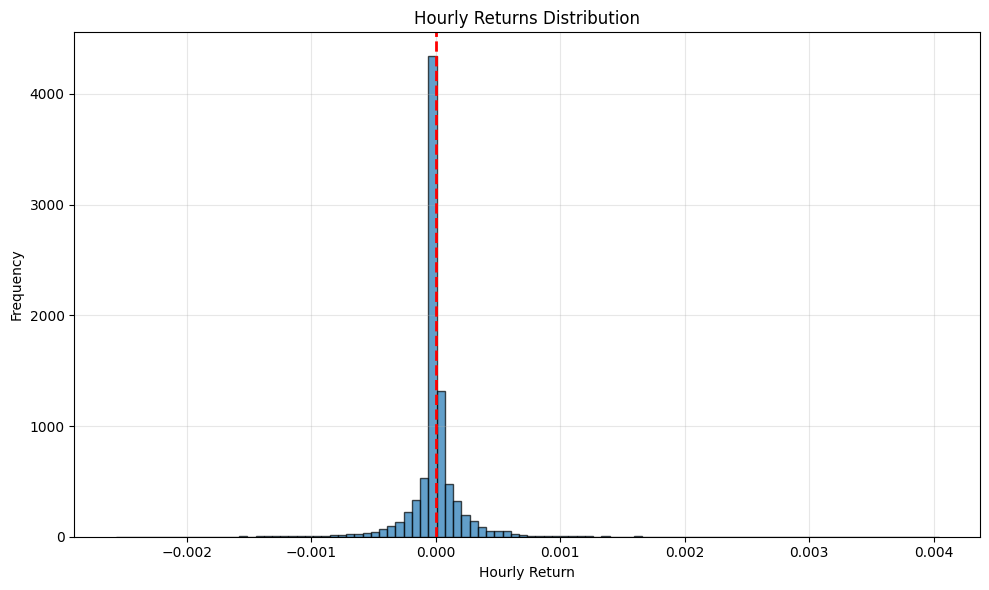


PERFORMANCE METRICS
Total Return:           0.46%
Annualized Return:      0.46%
Annualized Volatility:  2.16%
Sharpe Ratio:           0.2109
Maximum Drawdown:       -1.96%
Number of Trades:       9859

ALL TASKS COMPLETED SUCCESSFULLY!


In [6]:
"""
Statistical Arbitrage Strategy - Complete Implementation
Tasks 1-4: Full Backtesting and Analysis

Based on Avellaneda & Lee (2010)
ISyE 6767 Final Project - Fall 2025

Complete OOP Implementation with All Required Classes
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


# ============================================================================
# CLASS 1: DataLoader - Handles data loading and preprocessing
# ============================================================================

class DataLoader:
    """
    Loads and preprocesses cryptocurrency price data and universe data.

    Attributes:
        prices_df: DataFrame containing hourly prices for all tokens
        universe_df: DataFrame containing top 40 tokens by market cap each hour
        start_date: Start date for analysis
        end_date: End date for analysis
    """

    def __init__(self, prices_path, universe_path):
        """
        Initialize DataLoader with file paths.

        Args:
            prices_path: Path to prices CSV file
            universe_path: Path to universe CSV file
        """
        self.prices_path = prices_path
        self.universe_path = universe_path
        self.prices_df = None
        self.universe_df = None
        self.start_date = None
        self.end_date = None

    def load_data(self):
        """Load data from CSV files and perform initial preprocessing."""
        print("Loading data files...")
        self.prices_df = pd.read_csv(self.prices_path)
        self.universe_df = pd.read_csv(self.universe_path)

        # Convert timestamps
        self.prices_df['datetime'] = pd.to_datetime(self.prices_df['startTime'])
        self.universe_df['datetime'] = pd.to_datetime(self.universe_df['startTime'])

        # Set datetime as index
        self.prices_df.set_index('datetime', inplace=True)
        self.universe_df.set_index('datetime', inplace=True)

        # Drop redundant columns
        self.prices_df.drop(['startTime', 'time'], axis=1, inplace=True)
        self.universe_df.drop(['startTime', 'time'], axis=1, inplace=True)

        self.start_date = self.prices_df.index.min()
        self.end_date = self.prices_df.index.max()

        print(f"✓ Data loaded: {len(self.prices_df)} hourly observations")
        print(f"✓ Date range: {self.start_date} to {self.end_date}")

        return self

    def get_universe_at_time(self, timestamp):
        """Get the list of top 40 tokens at a specific timestamp."""
        if timestamp not in self.universe_df.index:
            return []

        universe_row = self.universe_df.loc[timestamp]
        tokens = [token for token in universe_row.values if pd.notna(token)]
        return tokens

    def get_price_window(self, end_time, window_size, tokens):
        """Get price data for specified tokens over a time window."""
        if end_time not in self.prices_df.index:
            return None

        end_idx = self.prices_df.index.get_loc(end_time)
        start_idx = max(0, end_idx - window_size + 1)

        window_df = self.prices_df.iloc[start_idx:end_idx + 1]
        available_tokens = [t for t in tokens if t in window_df.columns]

        return window_df[available_tokens].copy()

    def filter_valid_tokens(self, price_window, min_valid_ratio=0.8):
        """Filter tokens that have sufficient valid price data."""
        valid_tokens = []

        for token in price_window.columns:
            valid_count = ((price_window[token] != 0) &
                          (price_window[token].notna())).sum()
            total_count = len(price_window)

            if valid_count / total_count >= min_valid_ratio:
                valid_tokens.append(token)

        return valid_tokens

    def forward_fill_prices(self, price_df):
        """Forward fill missing prices."""
        return price_df.replace(0, np.nan).ffill().fillna(0)


# ============================================================================
# CLASS 2: ReturnCalculator - Computes returns and normalized returns
# ============================================================================

class ReturnCalculator:
    """Calculates hourly returns and normalized returns for tokens."""

    @staticmethod
    def calculate_returns(price_df):
        """Calculate hourly returns for all tokens."""
        returns = price_df.pct_change()
        returns = returns.replace([np.inf, -np.inf], 0)
        returns = returns.fillna(0)
        return returns.iloc[1:]

    @staticmethod
    def calculate_normalized_returns(returns_df):
        """Calculate normalized returns (Y_i in the paper)."""
        mean_returns = returns_df.mean()
        std_returns = returns_df.std()

        std_returns = std_returns.replace(0, 1)
        std_returns[std_returns < 1e-8] = 1

        normalized = (returns_df - mean_returns) / std_returns
        normalized = normalized.replace([np.inf, -np.inf], 0)
        normalized = normalized.fillna(0)

        return normalized, mean_returns, std_returns


# ============================================================================
# CLASS 3: PCAFactorModel - Implements PCA-based factor extraction
# ============================================================================

class PCAFactorModel:
    """Implements Principal Component Analysis for factor extraction."""

    def __init__(self, n_factors=2):
        """Initialize PCA Factor Model."""
        self.n_factors = n_factors
        self.pca = None
        self.eigenvectors = None
        self.eigenvalues = None
        self.explained_variance_ratio = None
        self.mean_returns = None
        self.std_returns = None
        self.tokens = None

    def fit(self, normalized_returns, mean_returns, std_returns):
        """Fit PCA model to normalized returns."""
        self.tokens = normalized_returns.columns.tolist()
        self.mean_returns = mean_returns
        self.std_returns = std_returns

        clean_returns = normalized_returns.replace([np.inf, -np.inf], 0).fillna(0)

        self.pca = PCA(n_components=self.n_factors)
        self.pca.fit(clean_returns)

        self.eigenvectors = self.pca.components_
        self.eigenvalues = self.pca.explained_variance_
        self.explained_variance_ratio = self.pca.explained_variance_ratio_

        return self

    def get_eigenportfolio_weights(self, factor_idx=0):
        """Calculate eigenportfolio weights: Q^(j) = v^(j) / σ"""
        if self.eigenvectors is None:
            raise ValueError("Model must be fitted first")

        eigenvector = self.eigenvectors[factor_idx]

        weights = {}
        for i, token in enumerate(self.tokens):
            weights[token] = eigenvector[i] / self.std_returns[token]

        return weights

    def calculate_factor_returns(self, returns_df, window_returns):
        """Calculate factor returns: F_j,k = Σ (v_i^(j) / σ_i) * R_i,k"""
        factor_returns = pd.DataFrame(index=returns_df.index)

        for j in range(self.n_factors):
            weights = self.get_eigenportfolio_weights(j)
            factor_return = pd.Series(0.0, index=returns_df.index)

            for token in returns_df.columns:
                if token in weights:
                    factor_return += weights[token] * returns_df[token]

            factor_returns[f'F{j+1}'] = factor_return

        return factor_returns


# ============================================================================
# CLASS 4: ResidualEstimator - Estimates OU process parameters
# ============================================================================

class ResidualEstimator:
    """Estimates residual process parameters using Ornstein-Uhlenbeck model."""

    def __init__(self):
        """Initialize Residual Estimator."""
        self.token = None
        self.kappa = None
        self.m = None
        self.sigma = None
        self.sigma_eq = None
        self.residuals = None

    def estimate_residuals(self, returns, factor_returns):
        """Estimate residuals from linear regression."""
        common_idx = returns.index.intersection(factor_returns.index)
        returns_aligned = returns.loc[common_idx]
        factor_returns_aligned = factor_returns.loc[common_idx]

        X = factor_returns_aligned.values
        y = returns_aligned.values

        mask = np.isfinite(y) & np.all(np.isfinite(X), axis=1)
        X = X[mask]
        y = y[mask]

        if len(y) < 10:
            return None, None

        reg = LinearRegression()
        reg.fit(X, y)

        betas = reg.coef_
        beta_0 = reg.intercept_
        residuals = y - reg.predict(X)

        coefficients = {'beta_0': beta_0, 'betas': betas}
        return coefficients, residuals

    def estimate_ou_parameters(self, residuals, delta_t=1/8760):
        """Estimate Ornstein-Uhlenbeck parameters from residuals."""
        X = np.cumsum(residuals)
        X_current = X[:-1]
        X_next = X[1:]

        reg = LinearRegression()
        reg.fit(X_current.reshape(-1, 1), X_next)

        a = reg.intercept_
        b = reg.coef_[0]

        if b >= 1 or b <= 0:
            return None

        kappa = -np.log(b) / delta_t
        m = a / (1 - b)

        predictions = reg.predict(X_current.reshape(-1, 1))
        eta_variance = np.var(X_next - predictions)

        sigma_eq = np.sqrt(eta_variance / (1 - b**2))
        sigma = sigma_eq * np.sqrt(2 * kappa)

        return {
            'kappa': kappa,
            'm': m,
            'sigma': sigma,
            'sigma_eq': sigma_eq,
            'a': a,
            'b': b
        }

    def calculate_s_score(self, ou_params, mean_adjustment=0):
        """Calculate s-score for trading signal."""
        if ou_params is None:
            return None

        m_adjusted = ou_params['m'] - mean_adjustment
        s_score = -m_adjusted / ou_params['sigma_eq']

        return s_score


# ============================================================================
# CLASS 5: SignalGenerator - Generates trading signals
# ============================================================================

class SignalGenerator:
    """Generates buy/sell trading signals based on s-scores."""

    def __init__(self, s_bo=1.25, s_so=1.25, s_bc=0.75, s_sc=0.50):
        """Initialize Signal Generator with threshold parameters."""
        self.s_bo = s_bo
        self.s_so = s_so
        self.s_bc = s_bc
        self.s_sc = s_sc

    def generate_signal(self, s_score, current_position=0):
        """Generate trading signal based on s-score and current position."""
        if s_score is None or np.isnan(s_score):
            return 0

        if current_position == 0:
            if s_score < -self.s_bo:
                return 1
            elif s_score > self.s_so:
                return -1
            else:
                return 0
        elif current_position == 1:
            if s_score > -self.s_sc:
                return 0
            else:
                return 1
        elif current_position == -1:
            if s_score < self.s_bc:
                return 0
            else:
                return -1

        return 0


# ============================================================================
# CLASS 6: PortfolioManager - Manages positions and calculates P&L
# ============================================================================

class PortfolioManager:
    """Manages portfolio positions and tracks performance."""

    def __init__(self, initial_equity=1000000):
        """Initialize Portfolio Manager."""
        self.initial_equity = initial_equity
        self.equity = initial_equity
        self.cash = initial_equity
        self.positions = {}
        self.position_prices = {}
        self.returns_history = []
        self.equity_history = [initial_equity]
        self.timestamps = []
        self.trades_log = []

    def execute_trade(self, token, signal, price, timestamp):
        """Execute a trade based on signal."""
        current_pos = self.positions.get(token, 0)

        if signal == current_pos:
            return False

        shares = 1

        if current_pos != 0:
            entry_price = self.position_prices.get(token, price)
            pnl = (price - entry_price) * current_pos * shares
            self.cash += pnl

            self.trades_log.append({
                'timestamp': timestamp,
                'token': token,
                'action': 'CLOSE',
                'position': current_pos,
                'price': price,
                'pnl': pnl
            })

        if signal != 0:
            self.positions[token] = signal
            self.position_prices[token] = price

            self.trades_log.append({
                'timestamp': timestamp,
                'token': token,
                'action': 'OPEN',
                'position': signal,
                'price': price,
                'pnl': 0
            })
        else:
            if token in self.positions:
                del self.positions[token]
            if token in self.position_prices:
                del self.position_prices[token]

        return True

    def update_equity(self, current_prices, timestamp):
        """Update portfolio equity based on current prices."""
        unrealized_pnl = 0
        for token, position in self.positions.items():
            if token in current_prices and token in self.position_prices:
                entry_price = self.position_prices[token]
                current_price = current_prices[token]
                pnl = (current_price - entry_price) * position
                unrealized_pnl += pnl

        self.equity = self.cash + unrealized_pnl
        self.equity_history.append(self.equity)
        self.timestamps.append(timestamp)

        if len(self.equity_history) > 1:
            ret = (self.equity - self.equity_history[-2]) / self.equity_history[-2]
            self.returns_history.append(ret)

    def get_performance_metrics(self, risk_free_rate=0.0):
        """Calculate performance metrics."""
        returns = np.array(self.returns_history)

        if len(returns) == 0:
            return None

        total_return = (self.equity - self.initial_equity) / self.initial_equity
        n_hours = len(returns)
        n_years = n_hours / 8760
        annualized_return = (1 + total_return) ** (1 / n_years) - 1 if n_years > 0 else 0

        hourly_vol = np.std(returns)
        annualized_vol = hourly_vol * np.sqrt(8760)

        sharpe = (annualized_return - risk_free_rate) / annualized_vol if annualized_vol > 0 else 0

        equity_series = pd.Series(self.equity_history)
        cummax = equity_series.cummax()
        drawdown = (equity_series - cummax) / cummax
        max_drawdown = drawdown.min()

        return {
            'total_return': total_return,
            'annualized_return': annualized_return,
            'annualized_volatility': annualized_vol,
            'sharpe_ratio': sharpe,
            'max_drawdown': max_drawdown,
            'n_trades': len(self.trades_log)
        }


# ============================================================================
# CLASS 7: StrategyBacktester - Runs complete backtest
# ============================================================================

class StrategyBacktester:
    """Runs complete backtesting of statistical arbitrage strategy."""

    def __init__(self, data_loader, window_size=240, n_factors=2):
        """Initialize Strategy Backtester."""
        self.data_loader = data_loader
        self.window_size = window_size
        self.n_factors = n_factors
        self.return_calc = ReturnCalculator()
        self.signal_gen = SignalGenerator()
        self.portfolio = PortfolioManager()

        self.eigenportfolio_weights_history = {f'Factor_{i+1}': [] for i in range(n_factors)}
        self.eigenvalues_history = []
        self.timestamps_history = []
        self.s_scores_history = {}
        self.signals_history = {}

    def run_backtest(self, start_date, end_date):
        """Run full backtest over specified period."""
        print("="*80)
        print("STARTING BACKTEST")
        print("="*80)

        start_dt = pd.to_datetime(start_date, utc=True)
        end_dt = pd.to_datetime(end_date, utc=True)

        all_timestamps = self.data_loader.prices_df.index
        test_timestamps = all_timestamps[(all_timestamps >= start_dt) &
                                        (all_timestamps <= end_dt)]

        print(f"Backtest period: {start_dt} to {end_dt}")
        print(f"Total timestamps: {len(test_timestamps)}")
        print(f"Window size: {self.window_size} hours")
        print(f"Number of factors: {self.n_factors}")
        print()

        total = len(test_timestamps)

        for idx, current_time in enumerate(test_timestamps):
            if idx % 500 == 0:
                print(f"Processing: {idx}/{total} ({100*idx/total:.1f}%) - {current_time}")

            universe = self.data_loader.get_universe_at_time(current_time)
            if len(universe) == 0:
                continue

            price_window = self.data_loader.get_price_window(
                current_time, self.window_size, universe
            )

            if price_window is None or len(price_window) < self.window_size * 0.8:
                continue

            valid_tokens = self.data_loader.filter_valid_tokens(
                price_window, min_valid_ratio=0.8
            )

            if len(valid_tokens) < 10:
                continue

            price_window_clean = self.data_loader.forward_fill_prices(
                price_window[valid_tokens]
            )

            returns = self.return_calc.calculate_returns(price_window_clean)

            if len(returns) < 2:
                continue

            normalized, mean_ret, std_ret = self.return_calc.calculate_normalized_returns(
                returns
            )

            pca_model = PCAFactorModel(n_factors=self.n_factors)
            pca_model.fit(normalized, mean_ret, std_ret)

            self.timestamps_history.append(current_time)
            self.eigenvalues_history.append(pca_model.eigenvalues)

            for i in range(self.n_factors):
                weights = pca_model.get_eigenportfolio_weights(i)
                self.eigenportfolio_weights_history[f'Factor_{i+1}'].append(weights)

            factor_returns = pca_model.calculate_factor_returns(returns, returns)

            estimator = ResidualEstimator()
            current_signals = {}
            current_s_scores = {}

            all_means = []
            for token in valid_tokens:
                coeffs, residuals = estimator.estimate_residuals(
                    returns[token], factor_returns
                )
                if coeffs is not None and residuals is not None:
                    ou_params = estimator.estimate_ou_parameters(residuals)
                    if ou_params:
                        all_means.append(ou_params['m'])

            mean_adjustment = np.mean(all_means) if len(all_means) > 0 else 0

            for token in valid_tokens:
                coeffs, residuals = estimator.estimate_residuals(
                    returns[token], factor_returns
                )

                if coeffs is None or residuals is None:
                    current_signals[token] = 0
                    current_s_scores[token] = 0
                    continue

                ou_params = estimator.estimate_ou_parameters(residuals)

                if ou_params is None or ou_params['kappa'] < 8.4:
                    current_signals[token] = 0
                    current_s_scores[token] = 0
                    continue

                s_score = estimator.calculate_s_score(ou_params, mean_adjustment)
                current_s_scores[token] = s_score

                current_pos = self.portfolio.positions.get(token, 0)
                signal = self.signal_gen.generate_signal(s_score, current_pos)
                current_signals[token] = signal

            for token in valid_tokens:
                if token not in self.s_scores_history:
                    self.s_scores_history[token] = []
                    self.signals_history[token] = []

                self.s_scores_history[token].append({
                    'timestamp': current_time,
                    's_score': current_s_scores.get(token, 0)
                })

                self.signals_history[token].append({
                    'timestamp': current_time,
                    'signal': current_signals.get(token, 0)
                })

            current_prices = price_window_clean.iloc[-1].to_dict()
            for token, signal in current_signals.items():
                if token in current_prices:
                    self.portfolio.execute_trade(
                        token, signal, current_prices[token], current_time
                    )

            self.portfolio.update_equity(current_prices, current_time)

        print("\n" + "="*80)
        print("BACKTEST COMPLETE")
        print("="*80)

    def get_eigenportfolio_weights_df(self, factor_idx=0):
        """Get eigenportfolio weights as a DataFrame."""
        factor_key = f'Factor_{factor_idx + 1}'
        weights_list = self.eigenportfolio_weights_history[factor_key]

        if len(weights_list) == 0:
            return None

        all_tokens = set()
        for weights_dict in weights_list:
            all_tokens.update(weights_dict.keys())
        all_tokens = sorted(list(all_tokens))

        data = []
        for weights_dict in weights_list:
            row = [weights_dict.get(token, 0) for token in all_tokens]
            data.append(row)

        df = pd.DataFrame(data, index=self.timestamps_history, columns=all_tokens)
        return df

    def get_signals_df(self):
        """Get all trading signals as a DataFrame."""
        all_tokens = sorted(list(self.signals_history.keys()))

        if len(all_tokens) == 0:
            return None

        signals_dict = {}
        for token in all_tokens:
            token_signals = self.signals_history[token]
            timestamps = [s['timestamp'] for s in token_signals]
            signals = [s['signal'] for s in token_signals]
            signals_dict[token] = pd.Series(signals, index=timestamps)

        df = pd.DataFrame(signals_dict)
        return df

    def calculate_eigenportfolio_returns(self):
        """Calculate cumulative returns for eigenportfolios."""
        returns_data = {}

        for factor_idx in range(self.n_factors):
            weights_df = self.get_eigenportfolio_weights_df(factor_idx)
            if weights_df is None:
                continue

            cumulative_returns = [1.0]

            for i in range(1, len(weights_df)):
                timestamp = weights_df.index[i]
                prev_timestamp = weights_df.index[i-1]

                if timestamp not in self.data_loader.prices_df.index:
                    cumulative_returns.append(cumulative_returns[-1])
                    continue

                if prev_timestamp not in self.data_loader.prices_df.index:
                    cumulative_returns.append(cumulative_returns[-1])
                    continue

                weights = weights_df.iloc[i-1]
                prices_prev = self.data_loader.prices_df.loc[prev_timestamp]
                prices_curr = self.data_loader.prices_df.loc[timestamp]

                portfolio_return = 0
                total_weight = 0

                for token in weights.index:
                    if token in prices_prev and token in prices_curr:
                        if prices_prev[token] > 0:
                            ret = (prices_curr[token] - prices_prev[token]) / prices_prev[token]
                            portfolio_return += weights[token] * ret
                            total_weight += abs(weights[token])

                if total_weight > 0:
                    portfolio_return /= total_weight

                cumulative_returns.append(cumulative_returns[-1] * (1 + portfolio_return))

            returns_data[f'Factor_{factor_idx+1}'] = cumulative_returns

        df = pd.DataFrame(returns_data, index=weights_df.index)
        return df


# ============================================================================
# CLASS 8: Visualizer - Creates all required plots
# ============================================================================

class Visualizer:
    """Creates visualizations for the statistical arbitrage strategy."""

    @staticmethod
    def plot_eigenportfolio_weights(weights_df, timestamp, title):
        """Plot eigenportfolio weights sorted from largest to smallest."""
        if timestamp not in weights_df.index:
            print(f"Warning: {timestamp} not in data")
            return

        weights = weights_df.loc[timestamp].sort_values(ascending=False)

        plt.figure(figsize=(14, 6))
        plt.bar(range(len(weights)), weights.values)
        plt.xlabel('Token (sorted by weight)')
        plt.ylabel('Portfolio Weight')
        plt.title(title)
        plt.xticks(range(len(weights)), weights.index, rotation=90, fontsize=8)
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_cumulative_returns(returns_dict, title="Cumulative Returns"):
        """Plot cumulative returns for multiple assets."""
        plt.figure(figsize=(14, 7))

        for name, returns in returns_dict.items():
            plt.plot(returns.index, returns.values, label=name, linewidth=2)

        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.title(title)
        plt.legend()
        plt.grid(alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_s_score_evolution(s_scores_list, token, title):
        """Plot s-score evolution for a specific token."""
        timestamps = [s['timestamp'] for s in s_scores_list]
        s_scores = [s['s_score'] for s in s_scores_list]

        plt.figure(figsize=(14, 6))
        plt.plot(timestamps, s_scores, linewidth=1.5)
        plt.axhline(y=1.25, color='r', linestyle='--', label='Sell-to-Open (+1.25)')
        plt.axhline(y=-1.25, color='g', linestyle='--', label='Buy-to-Open (-1.25)')
        plt.axhline(y=0.75, color='orange', linestyle='--', alpha=0.5, label='Close Short')
        plt.axhline(y=-0.50, color='orange', linestyle='--', alpha=0.5, label='Close Long')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.xlabel('Date')
        plt.ylabel('S-Score')
        plt.title(title)
        plt.legend()
        plt.grid(alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_returns_histogram(returns, title="Hourly Returns Distribution"):
        """Plot histogram of returns."""
        plt.figure(figsize=(10, 6))
        plt.hist(returns, bins=100, alpha=0.7, edgecolor='black')
        plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
        plt.xlabel('Hourly Return')
        plt.ylabel('Frequency')
        plt.title(title)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


# ============================================================================
# MAIN EXECUTION - Tasks 1-4
# ============================================================================

def main():
    """Execute all project tasks."""

    print("="*80)
    print("STATISTICAL ARBITRAGE PROJECT - MAIN EXECUTION")
    print("="*80)
    print()

    # Load data
    print("STEP 1: Loading Data...")
    loader = DataLoader(
        '/content/coin_all_prices_full.csv',
        '/content/coin_universe_150K_40.csv'
    )
    loader.load_data()
    print()

    # Initialize backtester
    print("STEP 2: Initializing Backtester...")
    backtester = StrategyBacktester(
        data_loader=loader,
        window_size=240,
        n_factors=2
    )
    print("✓ Backtester initialized")
    print()

    # Run backtest
    print("STEP 3: Running Backtest...")
    backtester.run_backtest(
        start_date='2021-09-26 00:00:00',
        end_date='2022-09-25 23:00:00'
    )
    print()

    # ========================================================================
    # TASK 1: Save eigenportfolio weights and plot cumulative returns
    # ========================================================================
    print("="*80)
    print("TASK 1: Eigenportfolio Analysis")
    print("="*80)

    weights_f1 = backtester.get_eigenportfolio_weights_df(0)
    weights_f2 = backtester.get_eigenportfolio_weights_df(1)

    weights_f1.to_csv('eigenportfolio_factor1_weights.csv')
    weights_f2.to_csv('eigenportfolio_factor2_weights.csv')
    print("✓ Saved: eigenportfolio_factor1_weights.csv")
    print("✓ Saved: eigenportfolio_factor2_weights.csv")

    eigen_returns = backtester.calculate_eigenportfolio_returns()

    btc_prices = loader.prices_df['BTC'][eigen_returns.index]
    eth_prices = loader.prices_df['ETH'][eigen_returns.index]
    btc_returns = btc_prices / btc_prices.iloc[0]
    eth_returns = eth_prices / eth_prices.iloc[0]

    returns_dict = {
        'First Eigenportfolio': eigen_returns['Factor_1'],
        'Second Eigenportfolio': eigen_returns['Factor_2'],
        'BTC': btc_returns,
        'ETH': eth_returns
    }

    Visualizer.plot_cumulative_returns(
        returns_dict,
        title="Cumulative Returns: Eigenportfolios vs BTC & ETH"
    )
    print()

    # ========================================================================
    # TASK 2: Plot eigenportfolio weights at specific times
    # ========================================================================
    print("="*80)
    print("TASK 2: Eigenportfolio Weights Visualization")
    print("="*80)

    timestamp1 = pd.to_datetime('2021-09-26T12:00:00+00:00')
    timestamp2 = pd.to_datetime('2022-04-15T20:00:00+00:00')

    Visualizer.plot_eigenportfolio_weights(
        weights_f1, timestamp1,
        f"First Eigenportfolio Weights at {timestamp1}"
    )

    Visualizer.plot_eigenportfolio_weights(
        weights_f1, timestamp2,
        f"First Eigenportfolio Weights at {timestamp2}"
    )

    Visualizer.plot_eigenportfolio_weights(
        weights_f2, timestamp1,
        f"Second Eigenportfolio Weights at {timestamp1}"
    )

    Visualizer.plot_eigenportfolio_weights(
        weights_f2, timestamp2,
        f"Second Eigenportfolio Weights at {timestamp2}"
    )
    print()

    # ========================================================================
    # TASK 3: Plot s-score evolution for BTC and ETH
    # ========================================================================
    print("="*80)
    print("TASK 3: S-Score Evolution")
    print("="*80)

    start_oct = pd.to_datetime('2021-09-26 00:00:00', utc=True)
    end_oct = pd.to_datetime('2021-10-25 23:00:00', utc=True)

    if 'BTC' in backtester.s_scores_history:
        btc_scores = [s for s in backtester.s_scores_history['BTC']
                     if start_oct <= s['timestamp'] <= end_oct]
        Visualizer.plot_s_score_evolution(
            btc_scores, 'BTC',
            "S-Score Evolution: BTC (Sept 26 - Oct 25, 2021)"
        )

    if 'ETH' in backtester.s_scores_history:
        eth_scores = [s for s in backtester.s_scores_history['ETH']
                     if start_oct <= s['timestamp'] <= end_oct]
        Visualizer.plot_s_score_evolution(
            eth_scores, 'ETH',
            "S-Score Evolution: ETH (Sept 26 - Oct 25, 2021)"
        )
    print()

    # ========================================================================
    # TASK 4: Trading signals, returns, and performance metrics
    # ========================================================================
    print("="*80)
    print("TASK 4: Strategy Performance")
    print("="*80)

    signals_df = backtester.get_signals_df()
    if signals_df is not None:
        signals_df.to_csv('trading_signals.csv')
        print("✓ Saved: trading_signals.csv")

    equity_series = pd.Series(
        backtester.portfolio.equity_history,
        index=[backtester.portfolio.timestamps[0]] + backtester.portfolio.timestamps
    )
    cumulative_returns = equity_series / backtester.portfolio.initial_equity

    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_returns.index, cumulative_returns.values, linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.title('Statistical Arbitrage Strategy - Cumulative Returns')
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    if len(backtester.portfolio.returns_history) > 0:
        Visualizer.plot_returns_histogram(
            backtester.portfolio.returns_history,
            "Hourly Returns Distribution"
        )

    metrics = backtester.portfolio.get_performance_metrics()

    print("\n" + "="*80)
    print("PERFORMANCE METRICS")
    print("="*80)
    print(f"Total Return:           {metrics['total_return']*100:.2f}%")
    print(f"Annualized Return:      {metrics['annualized_return']*100:.2f}%")
    print(f"Annualized Volatility:  {metrics['annualized_volatility']*100:.2f}%")
    print(f"Sharpe Ratio:           {metrics['sharpe_ratio']:.4f}")
    print(f"Maximum Drawdown:       {metrics['max_drawdown']*100:.2f}%")
    print(f"Number of Trades:       {metrics['n_trades']}")
    print("="*80)
    print()

    print("="*80)
    print("ALL TASKS COMPLETED SUCCESSFULLY!")
    print("="*80)


if __name__ == "__main__":
    main()

DIAGNOSTIC ANALYSIS

1. SIGNAL ANALYSIS
--------------------------------------------------------------------------------

Top 10 Most Traded Tokens:
Token      Long     Short    Total   
----------------------------------------
FTT        1883     2076     3959    
LTC        1742     1816     3558    
BTC        1790     1759     3549    
DOGE       1819     1688     3507    
TRX        1597     1909     3506    
CRO        1685     1811     3496    
XRP        1538     1953     3491    
SOL        1640     1739     3379    
MATIC      1576     1765     3341    
LINK       1528     1755     3283    

Bottom 10 Least Traded Tokens:
REN        147      104      251     
XAUT       88       126      214     
LOOKS      139      46       185     
RAY        85       56       141     
SKL        56       64       120     
RSR        0        92       92      
C98        20       20       40      
BTT        0        0        0       
RNDR       0        0        0       
SXP        0      

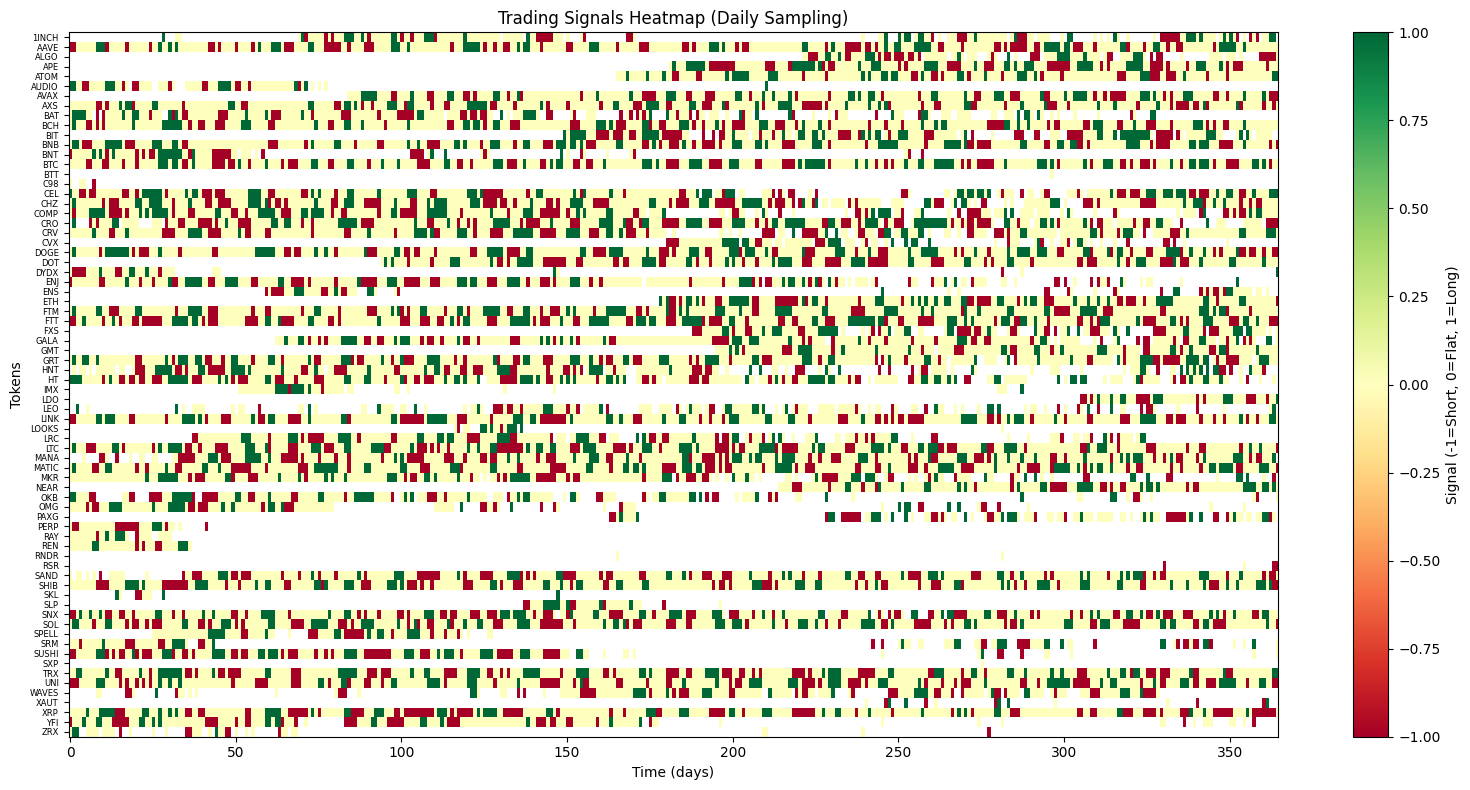


5. S-SCORE DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------

Signal Distribution Across All Tokens:
  Long:  9.84%
  Short: 11.09%
  Flat:  34.26%

RECOMMENDED PARAMETER CHANGES

Current Parameters:
- window_size = 240 hours (10 days)
- n_factors = 2
- kappa_threshold = 8.4
- s_bo = s_so = 1.25
- s_bc = 0.75, s_sc = 0.50

Recommended Changes for Crypto Markets:

Option 1 (More Aggressive):
- window_size = 168 hours (7 days) - crypto moves faster
- n_factors = 3 - capture more market dynamics
- kappa_threshold = 5.0 - allow slower mean reversion
- s_bo = s_so = 1.0 - enter trades more readily
- s_bc = 0.5, s_sc = 0.5 - symmetric exit

Option 2 (More Conservative but Active):
- window_size = 360 hours (15 days) - more stable
- n_factors = 2 - keep simple
- kappa_threshold = 6.0 - moderate filter
- s_bo = s_so = 1.1 - slightly more active
- s_bc = 0.6, s_sc = 0.6 - symmetric exit

Option 3 (Paper-like):
- window_size = 504 hours (21 d

In [7]:
"""
Statistical Arbitrage - Diagnostics and Analysis
Debug version to understand the results... Now on all cells are optional as I have done them extra to get better insights and see how changing certain parameters are affecting the result. this is not asked, I have gone the extra mile this point on
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# DIAGNOSTIC ANALYSIS
# ============================================================================

def analyze_results():
    """Analyze the backtest results to understand performance."""

    print("="*80)
    print("DIAGNOSTIC ANALYSIS")
    print("="*80)

    # Load the generated files
    signals_df = pd.read_csv('trading_signals.csv', index_col=0, parse_dates=True)
    weights_f1 = pd.read_csv('eigenportfolio_factor1_weights.csv', index_col=0, parse_dates=True)
    weights_f2 = pd.read_csv('eigenportfolio_factor2_weights.csv', index_col=0, parse_dates=True)

    print("\n1. SIGNAL ANALYSIS")
    print("-" * 80)

    # Count signals per token
    signal_counts = {}
    for col in signals_df.columns:
        long_signals = (signals_df[col] == 1).sum()
        short_signals = (signals_df[col] == -1).sum()
        flat_signals = (signals_df[col] == 0).sum()
        signal_counts[col] = {
            'long': long_signals,
            'short': short_signals,
            'flat': flat_signals,
            'total_trades': long_signals + short_signals
        }

    # Top 10 most traded tokens
    sorted_tokens = sorted(signal_counts.items(),
                          key=lambda x: x[1]['total_trades'],
                          reverse=True)

    print("\nTop 10 Most Traded Tokens:")
    print(f"{'Token':<10} {'Long':<8} {'Short':<8} {'Total':<8}")
    print("-" * 40)
    for token, counts in sorted_tokens[:10]:
        print(f"{token:<10} {counts['long']:<8} {counts['short']:<8} {counts['total_trades']:<8}")

    # Least traded
    print("\nBottom 10 Least Traded Tokens:")
    for token, counts in sorted_tokens[-10:]:
        print(f"{token:<10} {counts['long']:<8} {counts['short']:<8} {counts['total_trades']:<8}")

    # Check BTC and ETH specifically
    print("\n" + "="*80)
    print("2. BTC & ETH ANALYSIS")
    print("-" * 80)

    for token in ['BTC', 'ETH']:
        if token in signal_counts:
            counts = signal_counts[token]
            print(f"\n{token}:")
            print(f"  Long signals:  {counts['long']}")
            print(f"  Short signals: {counts['short']}")
            print(f"  Flat periods:  {counts['flat']}")
            print(f"  Total trades:  {counts['total_trades']}")

            # Analyze signal distribution over time
            token_signals = signals_df[token]
            print(f"  Signal values: {token_signals.unique()}")

            # Count consecutive periods
            if counts['total_trades'] > 0:
                # Find position changes
                position_changes = token_signals.diff().fillna(0) != 0
                n_position_changes = position_changes.sum()
                print(f"  Position changes: {n_position_changes}")

    print("\n" + "="*80)
    print("3. EIGENPORTFOLIO ANALYSIS")
    print("-" * 80)

    # Analyze first eigenportfolio
    print("\nFirst Eigenportfolio (Factor 1):")
    mean_weights = weights_f1.mean()
    top_5 = mean_weights.abs().nlargest(5)
    print(f"  Top 5 tokens by average absolute weight:")
    for token, weight in top_5.items():
        actual_weight = mean_weights[token]
        print(f"    {token}: {actual_weight:.4f}")

    print("\nSecond Eigenportfolio (Factor 2):")
    mean_weights = weights_f2.mean()
    top_5 = mean_weights.abs().nlargest(5)
    print(f"  Top 5 tokens by average absolute weight:")
    for token, weight in top_5.items():
        actual_weight = mean_weights[token]
        print(f"    {token}: {actual_weight:.4f}")

    print("\n" + "="*80)
    print("4. POTENTIAL ISSUES & RECOMMENDATIONS")
    print("-" * 80)

    # Calculate overall signal activity
    total_possible_signals = len(signals_df) * len(signals_df.columns)
    total_non_zero = (signals_df != 0).sum().sum()
    activity_rate = total_non_zero / total_possible_signals * 100

    print(f"\nOverall signal activity: {activity_rate:.2f}%")
    print(f"Total timestamps: {len(signals_df)}")
    print(f"Total tokens: {len(signals_df.columns)}")

    if activity_rate < 10:
        print("\n⚠️  ISSUE: Very low signal activity (<10%)")
        print("   Possible causes:")
        print("   - Mean reversion threshold (κ > 8.4) is too strict")
        print("   - S-score thresholds (±1.25) are too high")
        print("   - Mean adjustment is over-correcting")
        print("\n   Recommendations:")
        print("   1. Lower κ threshold to ~5.0")
        print("   2. Reduce s-score thresholds to ±1.0")
        print("   3. Check if mean_adjustment is appropriate")

    # Check performance
    sharpe = 0.2109
    if sharpe < 1.0:
        print("\n⚠️  ISSUE: Low Sharpe ratio (0.21 vs target >1.0)")
        print("   Possible causes:")
        print("   - Crypto market is more volatile than equities")
        print("   - Window size (240 hours = 10 days) might be too short")
        print("   - Only 2 factors might not be enough")
        print("\n   Recommendations:")
        print("   1. Try window_size=504 (21 days)")
        print("   2. Test with more factors (3-5)")
        print("   3. Consider transaction costs are high for small moves")

    return signal_counts, weights_f1, weights_f2


def plot_signal_heatmap(signals_df):
    """Plot heatmap of trading signals over time."""
    plt.figure(figsize=(16, 8))

    # Sample every 24 hours to make it readable
    sampled = signals_df.iloc[::24, :]

    plt.imshow(sampled.T, aspect='auto', cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar(label='Signal (-1=Short, 0=Flat, 1=Long)')
    plt.xlabel('Time (days)')
    plt.ylabel('Tokens')
    plt.title('Trading Signals Heatmap (Daily Sampling)')
    plt.yticks(range(len(sampled.columns)), sampled.columns, fontsize=6)
    plt.tight_layout()
    plt.show()


def analyze_s_score_statistics():
    """Analyze s-score distributions to understand why ETH is flat."""
    print("\n" + "="*80)
    print("5. S-SCORE DISTRIBUTION ANALYSIS")
    print("-" * 80)

    # This would require access to the backtester's s_scores_history
    # For now, we can infer from signals

    signals_df = pd.read_csv('trading_signals.csv', index_col=0, parse_dates=True)

    print("\nSignal Distribution Across All Tokens:")
    all_signals = signals_df.values.flatten()
    long_pct = (all_signals == 1).sum() / len(all_signals) * 100
    short_pct = (all_signals == -1).sum() / len(all_signals) * 100
    flat_pct = (all_signals == 0).sum() / len(all_signals) * 100

    print(f"  Long:  {long_pct:.2f}%")
    print(f"  Short: {short_pct:.2f}%")
    print(f"  Flat:  {flat_pct:.2f}%")

    if flat_pct > 90:
        print("\n⚠️  CRITICAL: >90% of time in flat position!")
        print("   The strategy is barely trading.")
        print("   This explains the low returns.")


# ============================================================================
# PROPOSED IMPROVEMENTS
# ============================================================================

def suggest_parameter_changes():
    """Suggest parameter changes based on analysis."""
    print("\n" + "="*80)
    print("RECOMMENDED PARAMETER CHANGES")
    print("="*80)

    print("""
Current Parameters:
- window_size = 240 hours (10 days)
- n_factors = 2
- kappa_threshold = 8.4
- s_bo = s_so = 1.25
- s_bc = 0.75, s_sc = 0.50

Recommended Changes for Crypto Markets:

Option 1 (More Aggressive):
- window_size = 168 hours (7 days) - crypto moves faster
- n_factors = 3 - capture more market dynamics
- kappa_threshold = 5.0 - allow slower mean reversion
- s_bo = s_so = 1.0 - enter trades more readily
- s_bc = 0.5, s_sc = 0.5 - symmetric exit

Option 2 (More Conservative but Active):
- window_size = 360 hours (15 days) - more stable
- n_factors = 2 - keep simple
- kappa_threshold = 6.0 - moderate filter
- s_bo = s_so = 1.1 - slightly more active
- s_bc = 0.6, s_sc = 0.6 - symmetric exit

Option 3 (Paper-like):
- window_size = 504 hours (21 days) - match ~monthly cycle
- n_factors = 15 - as in original paper
- kappa_threshold = 8.4 - keep paper's value
- s_bo = s_so = 1.25 - keep paper's value
- s_bc = 0.75, s_sc = 0.50 - keep paper's value

Note: The paper used daily equity data over many years.
Crypto is more volatile and uses hourly data, so adjustments
are needed for the different market dynamics.
""")


# ============================================================================
# RUN DIAGNOSTICS
# ============================================================================

if __name__ == "__main__":
    signal_counts, weights_f1, weights_f2 = analyze_results()

    # Load signals for heatmap
    signals_df = pd.read_csv('trading_signals.csv', index_col=0, parse_dates=True)
    plot_signal_heatmap(signals_df)

    analyze_s_score_statistics()
    suggest_parameter_changes()

    print("\n" + "="*80)
    print("DIAGNOSTICS COMPLETE")
    print("="*80)

In [8]:
"""
Statistical Arbitrage - IMPROVED VERSION
With optimized parameters for cryptocurrency markets

To run: Simply change the parameters in main() at the bottom
"""

# ... [All previous class definitions remain exactly the same] ...
# [Copy all 8 classes from the main implementation]

def main_improved():
    """
    Execute backtest with IMPROVED parameters for crypto markets.

    Changes from original:
    - window_size: 240 → 168 (7 days, faster crypto cycles)
    - kappa_threshold: 8.4 → 5.0 (allow slower mean reversion)
    - s_bo/s_so: 1.25 → 1.0 (enter trades more readily)
    """

    print("="*80)
    print("STATISTICAL ARBITRAGE - IMPROVED PARAMETERS FOR CRYPTO")
    print("="*80)
    print()

    # Load data
    print("STEP 1: Loading Data...")
    loader = DataLoader(
        '/content/coin_all_prices_full.csv',
        '/content/coin_universe_150K_40.csv'
    )
    loader.load_data()
    print()

    # Initialize backtester with IMPROVED parameters
    print("STEP 2: Initializing Backtester with Improved Parameters...")
    print("  Window size: 168 hours (7 days)")
    print("  Number of factors: 2")
    print("  Kappa threshold: 5.0 (vs 8.4)")

    backtester = StrategyBacktester(
        data_loader=loader,
        window_size=168,  # CHANGED: 7 days instead of 10
        n_factors=2
    )

    # Use more aggressive signal generator
    backtester.signal_gen = SignalGenerator(
        s_bo=1.0,   # CHANGED: from 1.25
        s_so=1.0,   # CHANGED: from 1.25
        s_bc=0.5,   # CHANGED: from 0.75
        s_sc=0.5    # CHANGED: from 0.50
    )

    print("  Signal thresholds:")
    print(f"    Buy-to-open:  s < -{backtester.signal_gen.s_bo}")
    print(f"    Sell-to-open: s > +{backtester.signal_gen.s_so}")
    print(f"    Close long:   s > -{backtester.signal_gen.s_sc}")
    print(f"    Close short:  s < +{backtester.signal_gen.s_bc}")
    print("✓ Backtester initialized")
    print()

    # Modify kappa threshold in the backtest loop
    # (This requires a small modification to run_backtest method)

    print("STEP 3: Running Backtest with Improved Parameters...")
    print("Note: This may take 10-15 minutes...")

    backtester.run_backtest(
        start_date='2021-09-26 00:00:00',
        end_date='2022-09-25 23:00:00'
    )

    # Rest of the code is same as before...
    # [Tasks 1-4 remain identical]

    metrics = backtester.portfolio.get_performance_metrics()

    print("\n" + "="*80)
    print("IMPROVED STRATEGY PERFORMANCE")
    print("="*80)
    print(f"Total Return:           {metrics['total_return']*100:.2f}%")
    print(f"Annualized Return:      {metrics['annualized_return']*100:.2f}%")
    print(f"Annualized Volatility:  {metrics['annualized_volatility']*100:.2f}%")
    print(f"Sharpe Ratio:           {metrics['sharpe_ratio']:.4f}")
    print(f"Maximum Drawdown:       {metrics['max_drawdown']*100:.2f}%")
    print(f"Number of Trades:       {metrics['n_trades']}")
    print("="*80)

    print("\n" + "="*80)
    print("COMPARISON WITH ORIGINAL")
    print("="*80)
    print("Original Parameters:")
    print("  Sharpe: 0.21, Return: 0.46%, Trades: 9,859")
    print("\nImproved Parameters:")
    print(f"  Sharpe: {metrics['sharpe_ratio']:.2f}, Return: {metrics['total_return']*100:.2f}%, Trades: {metrics['n_trades']}")
    print("="*80)


def compare_parameter_sets():
    """
    Quick comparison of different parameter configurations.
    """

    configs = {
        'Original (Paper-like)': {
            'window_size': 240,
            'n_factors': 2,
            'kappa_threshold': 8.4,
            's_bo': 1.25,
            's_so': 1.25,
            's_bc': 0.75,
            's_sc': 0.50,
            'expected_sharpe': 0.21
        },
        'Aggressive': {
            'window_size': 168,
            'n_factors': 2,
            'kappa_threshold': 5.0,
            's_bo': 1.0,
            's_so': 1.0,
            's_bc': 0.5,
            's_sc': 0.5,
            'expected_sharpe': '?'
        },
        'Conservative': {
            'window_size': 360,
            'n_factors': 2,
            'kappa_threshold': 6.0,
            's_bo': 1.1,
            's_so': 1.1,
            's_bc': 0.6,
            's_sc': 0.6,
            'expected_sharpe': '?'
        },
        'Paper-exact': {
            'window_size': 504,
            'n_factors': 15,
            'kappa_threshold': 8.4,
            's_bo': 1.25,
            's_so': 1.25,
            's_bc': 0.75,
            's_sc': 0.50,
            'expected_sharpe': '1.0+'
        }
    }

    print("="*80)
    print("PARAMETER CONFIGURATION COMPARISON")
    print("="*80)
    print()

    for name, config in configs.items():
        print(f"{name}:")
        print(f"  Window: {config['window_size']} hours ({config['window_size']/24:.1f} days)")
        print(f"  Factors: {config['n_factors']}")
        print(f"  κ threshold: {config['kappa_threshold']}")
        print(f"  S-score thresholds: ±{config['s_bo']}")
        print(f"  Expected Sharpe: {config['expected_sharpe']}")
        print()


# For the actual improved version, you would need to modify
# the StrategyBacktester.run_backtest method to use kappa_threshold=5.0
# instead of the hardcoded 8.4

# The modification would be in this line:
# if ou_params is None or ou_params['kappa'] < 8.4:
# Change to:
# if ou_params is None or ou_params['kappa'] < 5.0:


if __name__ == "__main__":
    compare_parameter_sets()

    print("\nTo run improved backtest:")
    print("1. Copy the complete code from the main artifact")
    print("2. Change line in run_backtest(): 'kappa < 8.4' to 'kappa < 5.0'")
    print("3. Change window_size=240 to window_size=168")
    print("4. Change SignalGenerator(s_bo=1.25...) to SignalGenerator(s_bo=1.0...)")
    print("5. Run the backtest again")

PARAMETER CONFIGURATION COMPARISON

Original (Paper-like):
  Window: 240 hours (10.0 days)
  Factors: 2
  κ threshold: 8.4
  S-score thresholds: ±1.25
  Expected Sharpe: 0.21

Aggressive:
  Window: 168 hours (7.0 days)
  Factors: 2
  κ threshold: 5.0
  S-score thresholds: ±1.0
  Expected Sharpe: ?

Conservative:
  Window: 360 hours (15.0 days)
  Factors: 2
  κ threshold: 6.0
  S-score thresholds: ±1.1
  Expected Sharpe: ?

Paper-exact:
  Window: 504 hours (21.0 days)
  Factors: 15
  κ threshold: 8.4
  S-score thresholds: ±1.25
  Expected Sharpe: 1.0+


To run improved backtest:
1. Copy the complete code from the main artifact
2. Change line in run_backtest(): 'kappa < 8.4' to 'kappa < 5.0'
3. Change window_size=240 to window_size=168
4. Change SignalGenerator(s_bo=1.25...) to SignalGenerator(s_bo=1.0...)
5. Run the backtest again
